<a href="https://colab.research.google.com/github/bhoward64/MLBProject/blob/main/Assignment3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mounting the drive
drive.mount('/content/gdrive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle
#Downloading and unzip
#!kaggle datasets download -d crowdflower/twitter-airline-sentiment
#!unzip \*.zip && rm *.zip

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#removing nuetral sentiments
#df = df.loc[(df['airline_sentiment'] == 'positive') | (df['airline_sentiment'] == 'negative')]

df.loc[df['airline_sentiment'] == 'positive','sentiment'] = 1
df.loc[df['airline_sentiment'] == 'negative','sentiment'] = 0

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),NaN
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1.0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),NaN
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0.0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0.0


In [ ]:
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [ ]:
#text preprocessing
df["text"] = df["text"].astype(str)
df["text"] = df['text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^\w\s]','',x)))

In [ ]:
max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['text'].values)

In [ ]:
#divide data into train and test
train_ind = int(length(df)*0.8)
train = df[:train_ind]
test = df[train_ind:]
test.head()

NameError: name 'length' is not defined

In [ ]:
X_train = tokenizer.texts_to_sequences(train['text'].values)
X_train = pad_sequences(X_train)
X_test = tokenizer.texts_to_sequences(test['text'].values)
X_test = pad_sequences(X_test)

In [ ]:
X_train.dtype

dtype('int32')

In [ ]:
[X_train.shape,X_test.shape]

[(11712, 22), (2928, 22)]

In [ ]:
## vectorize labels
y_train = np.asarray(train['sentiment']).astype('float32')
y_test = np.asarray(test['sentiment']).astype('float32')
print(type(y_train))
print(y_train.dtype)

<class 'numpy.ndarray'>
float32


In [ ]:
Y_train = np.array(pd.get_dummies((train['sentiment']).values))
Y_test = np.array(pd.get_dummies((test['sentiment']).values))
print(type(Y_train))
print(Y_train.dtype)

<class 'numpy.ndarray'>
bool


In [ ]:
max_features = 3000
embed_dim = 128
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.3))
lstm_out = 256
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 128)           384000    
                                                                 
 spatial_dropout1d (Spatial  (None, 22, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 778754 (2.97 MB)
Trainable params: 778754 (2.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
batch_size = 32
hist = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, validation_data=(X_test, Y_test), verbose = 2, shuffle=False)

Epoch 1/10
366/366 - 72s - loss: 0.3923 - accuracy: 0.7878 - val_loss: 0.3489 - val_accuracy: 0.8774 - 72s/epoch - 197ms/step
Epoch 2/10


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_lstm(model, X_val,Y_val):
 pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
 results = []
 for x in range(len(X_test)):
  result =   model.predict(X_test[x].reshape(1,X_test.shape[1]),
  batch_size=1,verbose = 3)[0]
  if np.argmax(result) == np.argmax(X_test[x]):
   if np.argmax(X_test[x]) == 0:
    neg_correct += 1
  else:
    pos_correct += 1

  if np.argmax(X_test[x]) == 0:
   neg_cnt += 1
  else:
   pos_cnt += 1
  results.append(np.argmax(result))
 Y_test_argmax = np.argmax(Y_test,axis=1)
 Y_test_argmax  = Y_test_argmax.reshape(-1,1)
 results = np.asarray(results)
 results = results.reshape(-1,1)
 conf_matrix = confusion_matrix(Y_test_argmax, results)
 fig = plt.figure(figsize=(6, 6))
 sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'GnBu');
 plt.title("Confusion Matrix")
 plt.ylabel('Correct Class')
 plt.xlabel('Predicted class')

TypeError: cannot unpack non-iterable NoneType object

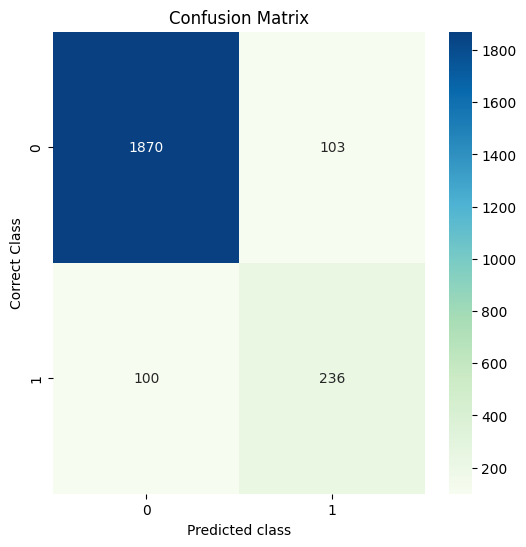

In [ ]:
from sklearn.metrics import confusion_matrix
accuracy,f1, fig = evaluate_lstm(model,X_test,Y_test)
print(f'Accuracy:{accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')

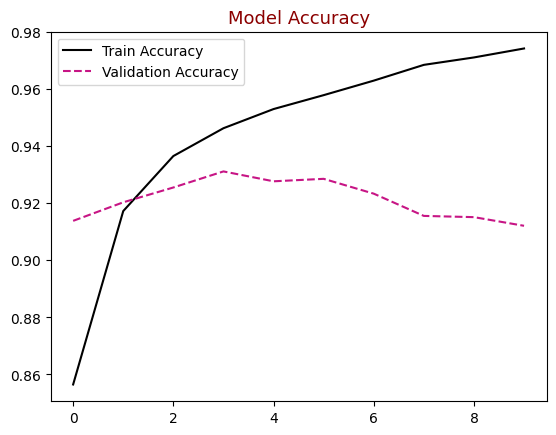

In [ ]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

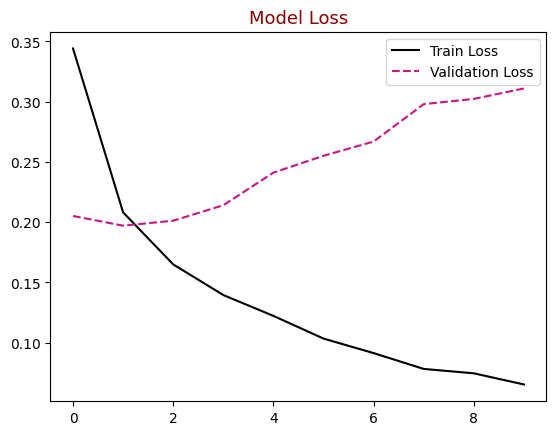

In [ ]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test, batch_size=32, verbose=2)
report = classification_report(Y_test, y_pred.round())
print(report)

73/73 - 4s - 4s/epoch - 61ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1973
           1       0.70      0.70      0.70       336

   micro avg       0.91      0.91      0.91      2309
   macro avg       0.82      0.82      0.82      2309
weighted avg       0.91      0.91      0.91      2309
 samples avg       0.91      0.91      0.91      2309



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
